In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as smf
import statsmodels.formula.api as sm

In [2]:
DT=pd.read_csv("delivery_time.csv")
DT.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [3]:
DT.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [4]:
dt=DT["Delivery Time"].values.reshape(-1,1)

In [5]:
dt

array([[21.  ],
       [13.5 ],
       [19.75],
       [24.  ],
       [29.  ],
       [15.35],
       [19.  ],
       [ 9.5 ],
       [17.9 ],
       [18.75],
       [19.83],
       [10.75],
       [16.68],
       [11.5 ],
       [12.03],
       [14.88],
       [13.75],
       [18.11],
       [ 8.  ],
       [17.83],
       [21.5 ]])

In [6]:
st=DT["Sorting Time"].values.reshape(-1,1)
st

array([[10],
       [ 4],
       [ 6],
       [ 9],
       [10],
       [ 6],
       [ 7],
       [ 3],
       [10],
       [ 9],
       [ 8],
       [ 4],
       [ 7],
       [ 3],
       [ 3],
       [ 4],
       [ 6],
       [ 7],
       [ 2],
       [ 7],
       [ 5]], dtype=int64)

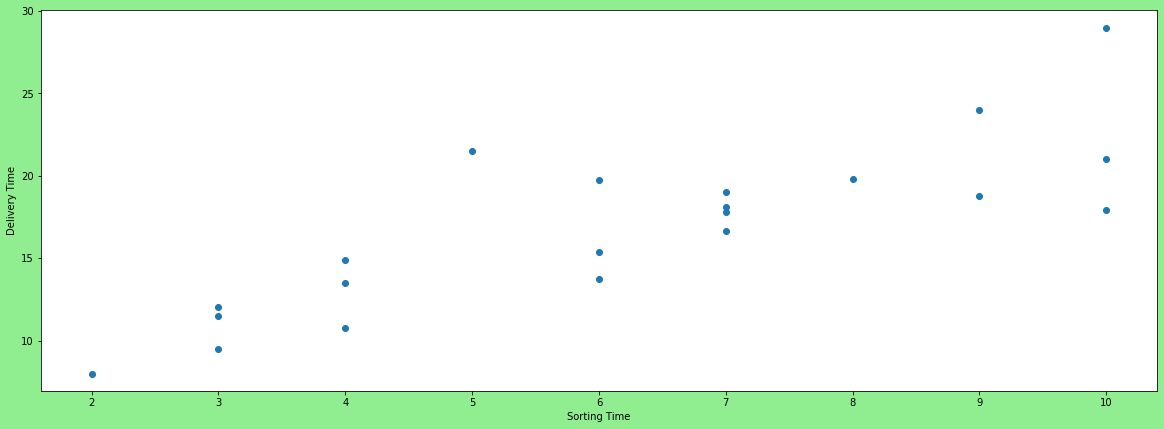

In [7]:
plt.figure(figsize=(20,7),facecolor="lightgreen")
plt.scatter(DT["Sorting Time"],DT["Delivery Time"])
plt.xlabel("Sorting Time");
plt.ylabel("Delivery Time")
plt.show()


model

In [8]:
model=LinearRegression()
model.fit(DT[["Delivery Time"]],DT["Sorting Time"])

LinearRegression()

In [13]:
model1 = sm.ols("dt~st", data=DT).fit()

In [14]:
model.coef_

array([0.41374363])

In [15]:
model1.predict()


array([23.07293294, 13.17881356, 16.47685335, 21.42391304, 23.07293294,
       16.47685335, 18.12587325, 11.52979366, 23.07293294, 21.42391304,
       19.77489315, 13.17881356, 18.12587325, 11.52979366, 11.52979366,
       13.17881356, 16.47685335, 18.12587325,  9.88077377, 18.12587325,
       14.82783346])

In [16]:
model1.params

Intercept    6.582734
st           1.649020
dtype: float64

In [17]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     dt   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Tue, 28 Mar 2023   Prob (F-statistic):           3.98e-06
Time:                        19:49:30   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
st             1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
model.intercept_

-0.7566733660351259

<AxesSubplot:xlabel='Sorting Time', ylabel='Delivery Time'>

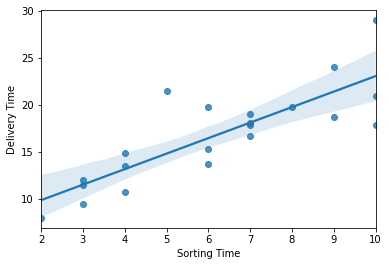

In [19]:
sns.regplot(x=DT['Sorting Time'],y=DT['Delivery Time']) 

In [20]:
DT.var()

Delivery Time    25.754619
Sorting Time      6.461905
dtype: float64

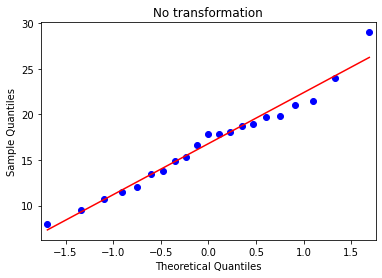

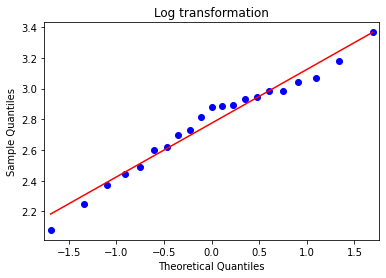

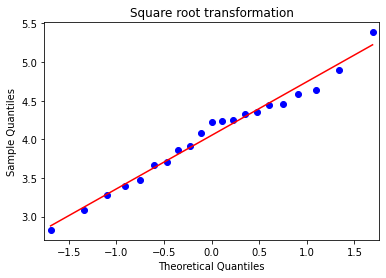

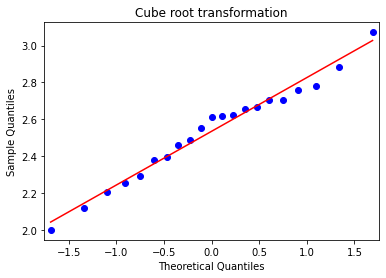

In [21]:
smf.qqplot(DT['Delivery Time'], line = 'r')
plt.title('No transformation')
smf.qqplot(np.log(DT['Delivery Time']), line = 'r')
plt.title('Log transformation')
smf.qqplot(np.sqrt(DT['Delivery Time']), line = 'r')
plt.title('Square root transformation')
smf.qqplot(np.cbrt(DT['Delivery Time']), line = 'r')
plt.title('Cube root transformation')
plt.show()

log transformation

In [22]:
model2 = sm.ols("dt~st", data=DT).fit()

In [23]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     dt   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Tue, 28 Mar 2023   Prob (F-statistic):           3.98e-06
Time:                        19:49:56   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
st             1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

square root transformation

In [25]:
model3 = sm.ols("dt~np.sqrt(st)", data=DT).fit()

In [26]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     dt   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     43.46
Date:                Tue, 28 Mar 2023   Prob (F-statistic):           2.61e-06
Time:                        19:50:53   Log-Likelihood:                -50.900
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -2.5188      2.995     -0.841      0.411      -8.788       3.751
np.sqrt(st)     7.9366      1.204      6.592      0.000       5.417      10.456
==============================================================================
Omnibus:                        4.658   Durbin-Watson:                   1.318
Prob(Omnibus):                  0.097   Jarque-Bera (JB):                2.824
Skew:                           0.865   Prob(JB):                        0.244
Kurtosis:                       3.483   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
model3.predict()

array([22.57886702, 13.35434489, 16.92176102, 21.29093564, 22.57886702,
       16.92176102, 18.47940877, 11.22774181, 22.57886702, 21.29093564,
       19.92923195, 13.35434489, 18.47940877, 11.22774181, 11.22774181,
       13.35434489, 16.92176102, 18.47940877,  8.70519766, 18.47940877,
       15.22791982])

exponential transfomation


In [29]:
model4 = sm.ols("dt~np.exp(st)", data=DT).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     dt   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     10.74
Date:                Tue, 28 Mar 2023   Prob (F-statistic):            0.00396
Time:                        19:51:58   Log-Likelihood:                -58.691
No. Observations:                  21   AIC:                             121.4
Df Residuals:                      19   BIC:                             123.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     15.0836      1.047     14.406      0.000      12.892      17.275
np.exp(st)     0.0004      0.000      3.277      0.004       0.000       0.001
==============================================================================
Omnibus:                        2.426   Durbin-Watson:                   1.676
Prob(Omnibus):                  0.297   Jarque-Bera (JB):                1.151
Skew:                          -0.087   Prob(JB):                        0.562
Kurtosis:                       1.866   Cond. No.                     1.01e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
model4.predict()

array([23.73908236, 15.10503289, 15.24210913, 18.26776013, 23.73908236,
       15.24210913, 15.51451022, 15.09147084, 23.73908236, 18.26776013,
       16.25497317, 15.10503289, 15.51451022, 15.09147084, 15.09147084,
       15.10503289, 15.24210913, 15.51451022, 15.08648164, 15.51451022,
       15.14189837])

# as the best final model we are going to take model3 as best fit model with r^2 70

In [31]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     dt   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     43.46
Date:                Tue, 28 Mar 2023   Prob (F-statistic):           2.61e-06
Time:                        19:53:20   Log-Likelihood:                -50.900
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -2.5188      2.995     -0.841      0.411      -8.788       3.751
np.sqrt(st)     7.9366      1.204      6.592      0.000       5.417      10.456
==============================================================================
Omnibus:                        4.658   Durbin-Watson:                   1.318
Prob(Omnibus):                  0.097   Jarque-Bera (JB):                2.824
Skew:                           0.865   Prob(JB):                        0.244
Kurtosis:                       3.483   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
model3.predict()

array([22.57886702, 13.35434489, 16.92176102, 21.29093564, 22.57886702,
       16.92176102, 18.47940877, 11.22774181, 22.57886702, 21.29093564,
       19.92923195, 13.35434489, 18.47940877, 11.22774181, 11.22774181,
       13.35434489, 16.92176102, 18.47940877,  8.70519766, 18.47940877,
       15.22791982])